# Feature Scaling

# ⚖️ Feature Scaling: Complete Notes

## ✅ What is Feature Scaling?

**Feature Scaling** is the process of transforming features (columns) in your dataset to be on a similar scale. This is crucial for machine learning algorithms that rely on distances, gradients, or regularization.

---

## ❓ Why Do We Need Feature Scaling?

### Without scaling, problems can occur:
- Features with **large ranges dominate** those with small ranges
- **Slower convergence** in gradient descent
- Poor performance in models like:
  - KNN (distance-based)
  - SVM (kernel-based)
  - Logistic/Linear Regression
  - Neural Networks

---

## 🔢 Common Feature Scaling Techniques

### 1. **Min-Max Scaling (Normalization)**

**Formula:**
\[
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
\]

- Scales values to range **[0, 1]**
- Preserves shape of original distribution

**Use When:**
- You need all features within a specific range
- You're using distance-based models (KNN, KMeans)

```python
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


2. Standardization (Z-score Scaling)
Formula:

𝑋
scaled
=
𝑋
−
𝜇
𝜎
X 
scaled
​
 = 
σ
X−μ
​
 
Resulting data has mean = 0 and std = 1

Doesn't bound values between 0 and 1

Use When:

Data is normally distributed or symmetric

You're using linear models or neural nets

python
Copy
Edit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
3. Robust Scaling
Formula:

𝑋
scaled
=
𝑋
−
Median
IQR
X 
scaled
​
 = 
IQR
X−Median
​
 
Uses median and IQR (Q3 - Q1)

Resistant to outliers

Use When:

Your data has many outliers

StandardScaler gets skewed by extreme values

python
Copy
Edit
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
4. MaxAbs Scaling
Formula:

𝑋
scaled
=
𝑋
∣
𝑋
max
⁡
∣
X 
scaled
​
 = 
∣X 
max
​
 ∣
X
​
 
Scales to range [-1, 1]

Good for sparse data (many 0s), e.g., TF-IDF vectors

python
Copy
Edit
from sklearn.preprocessing import MaxAbsScaler
🧠 When Scaling is Essential
Algorithm	Scaling Required?	Why
KNN / KMeans	✅ Yes	Distance sensitive
SVM	✅ Yes	Kernel uses inner product
PCA	✅ Yes	Based on variance
Gradient Descent	✅ Yes	Speeds up convergence
Neural Networks	✅ Yes	Stable training
Tree-based models (e.g., Random Forest, XGBoost)	❌ Not required	Trees split data using thresholds, not distance

🧪 Example Dataset Before & After Scaling:
Feature	Original	MinMax	Standard
Age	22	0.1	-1.2
Salary	100000	0.9	1.5

🛠️ Tip for Scaling During ML Pipeline
Use ColumnTransformer or Pipeline:

python
Copy
Edit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
🧾 Summary Table
Method	Resists Outliers	Range	Mean=0, Std=1	When to Use
MinMaxScaler	❌ No	[0, 1]	❌ No	KNN, NN, SVM
StandardScaler	❌ No	No bounds	✅ Yes	LR, SVM, NN
RobustScaler	✅ Yes	No bounds	❌ No	Data with outliers
MaxAbsScaler	❌ No	[-1, 1]	❌ No	Sparse data

⚠️ Common Mistakes
❌ Scaling before train-test split (causes data leakage)

❌ Forgetting to fit the scaler only on training data, then transform test data

📚 Summary
Feature scaling is essential for consistent, fast, and fair ML performance

Choose the right scaler based on data distribution and model type

Always fit scaler on training data only and transform test data accordingly

vbnet
Copy
Edit


* In the data we will see very large number and very low value number.  So that will get dominating and neglected repectivly  
* So in feature scaling we will equalise both the very high value and very low value data  
* note: the feature scaling wont change the nature of data and we wont lose any of information  it is just the data magnitude will be get reduced

*Types*
1) Standardisation
2) Normalisarion ( min max scaling )

**Standardisation**
* It is very effective technique which re-scales a feature value so that is has distibuted with mean 0 and variance 1
* Range (no fixed)
* Xnew = (X_i-X_mean)/alpha
* 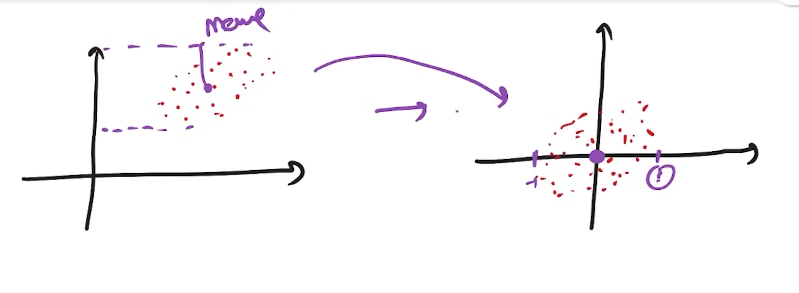
* Note: outliers wont be effected by this 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('D:/Data Science/Datasets/loan.csv')
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So before directly jumping into scaling, we need to knwo the nature of the data  
Weather we have outlier and all

📊 distplot() — What It Does (Seaborn)
distplot() is a Seaborn function used to visualize the distribution of a dataset, combining:

A histogram (bars showing frequency)

A KDE (Kernel Density Estimate) curve (a smooth line showing probability distribution)



C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7756\1550950910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

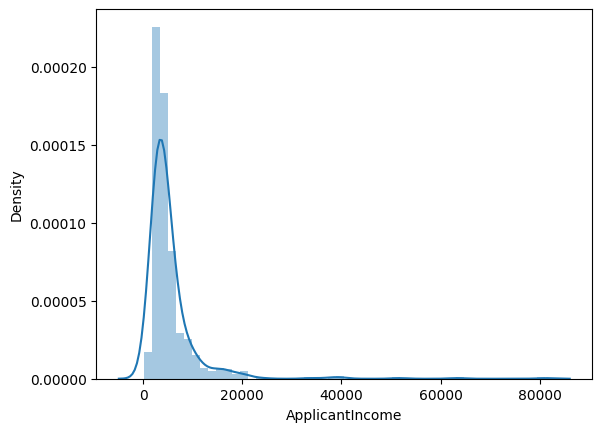

In [21]:
sns.distplot(data['ApplicantIncome'])

In [23]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here e can see that the min and max value is way too large

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()
ss.fit(data[['ApplicantIncome']])

StandardScaler()

In [32]:
data['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(data[['ApplicantIncome']]))

In [34]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [35]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7756\1043252402.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome_ss'])
C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7756\1043252402.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'

Text(0.5, 1.0, 'After')

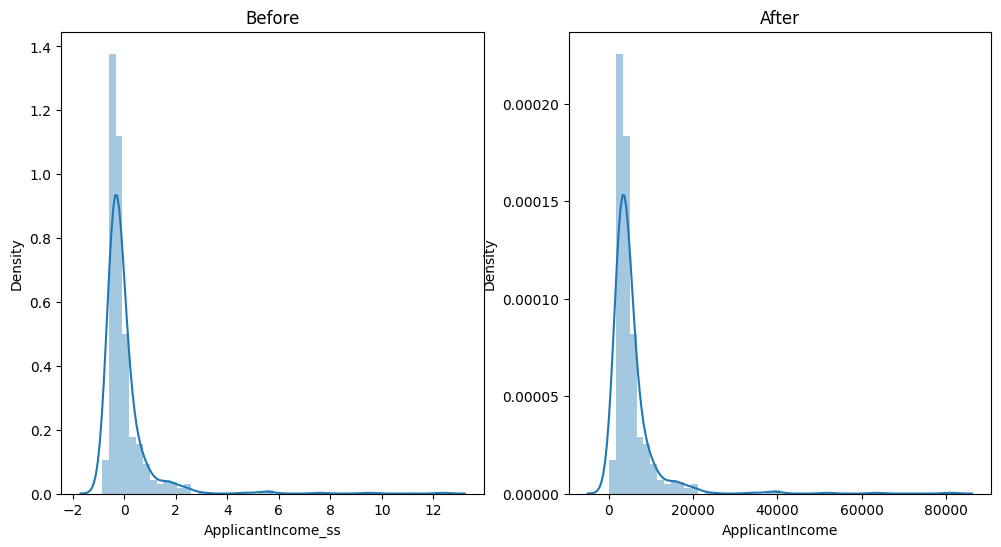

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome_ss'])
plt.title("Before")
plt.subplot(1,2,2)
sns.distplot(data['ApplicantIncome'])
plt.title("After")

Here we can see that just the magnitude of the data is been reduced, but nature is same
* Earlier it was 0-80000
* Now -2 - 12
* Note: Outliers wont get effected in this

**Normalisation** (Min-max technique)

* Values are shifted and rescaled so that they end up ranging between 0 and 1
* In this also the nature of data wont get changes  
* But the defference here is, the reduce according to min and max
* Range (0,1)
* Xnew = Xi-min(X)/max(x)-min(X)
* 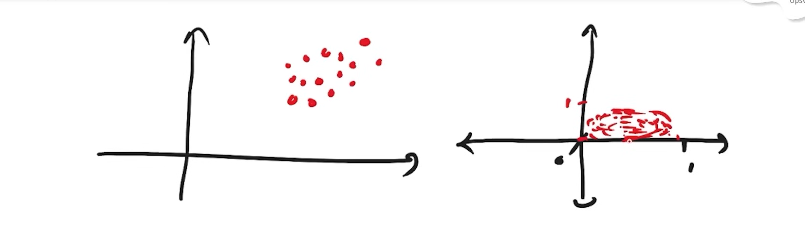

C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7756\2927570251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

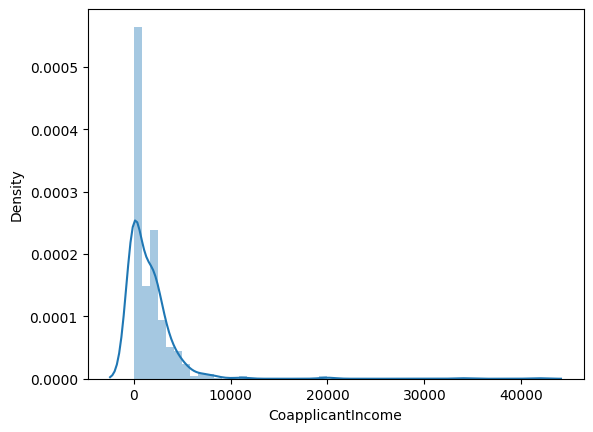

In [49]:
sns.distplot(data['CoapplicantIncome'])

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
ms = MinMaxScaler()
data['trasnformed']= pd.DataFrame(ms.fit_transform(data[['CoapplicantIncome']]))

In [55]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,trasnformed
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.410130,0.000000
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.212557,0.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.437174,0.005760
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.357064,0.000000


C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7756\773333710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trasnformed'])


<Axes: xlabel='trasnformed', ylabel='Density'>

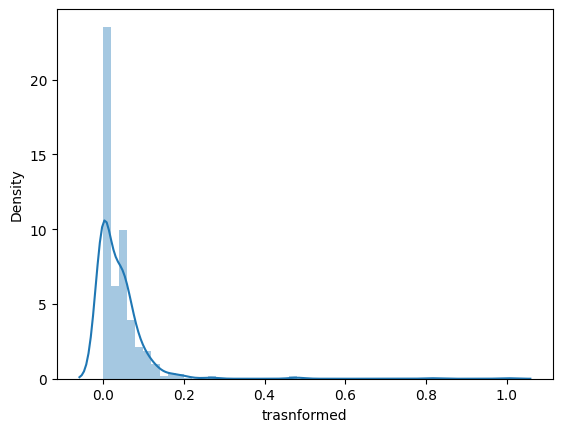

In [60]:
sns.distplot(data['trasnformed'])